# 4101553 Métodos Numéricos aplicados a la Ingenieria Civil
Departamento de Ingeniería Civil\
Universidad Nacional de Colombia\
Sede Manizales

**Docente:** Juan Nicolás Ramírez Giraldo ([jnramirezg@unal.edu.co](mailto:jnramirezg@unal.edu.co))

"*Cum cogitaveris quot te antecedant, respice quot sequantur*"\
**Séneca**


[Repositorio de la asignatura](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/)



# Unidad 1: Sistemas de ecuaciones lineales
## Sistemas de ecuaciones pequeños

1. Método gráfico
2. Regla de Cramer


### Método gráfico
Es la forma elemental de solución de ecuaciones, es el primer sistema de ecuaciones que se aprende a resolver. Tiene la forma general:

$a x + b y = c$\
$d x + e y = f$


Se puede implementar un programa para resolver gráficamente cualquier sistema de 2x2 como este:

In [1]:
# Importación de librerías.
import matplotlib.pyplot as plt
import numpy as np

def graficar_rectas(a, b, c, d, e, f):
    ''' 
        Grafica dos rectas a partir de los parámetros a, b, c, d, e, f.
        Donde:
        ax + by = c
        dx + ey = f
    '''
    x = np.array([0, 10])  # Definición de puntos de evaluación.
    y1 = (c - a*x)/b
    y2 = (f - d*x)/e
    
    plt.figure()
    plt.plot(x, y1, label=f"{a}$x$+{b}$y$={c}")  # Grafica la primera recta
    plt.plot(x, y2, label=f"{d}$x$+{e}$y$={f}")  # Grafica la segunda recta
    plt.legend()  # Muestra leyendas
    plt.grid()    # Muestra grilla
    plt.show()    # Imprime la gráfica


Con este método se pueden identificar 4 posibles tipos de resultados:
- Sistema con una única solución.
- Sistema sin solución.
- Sistema con infinitas soluciones.
- Sistema mal condicionado.

**Nota**: Los ejemplos fueron adaptados de la sección 9.1.1. de Chapra séptima edición.

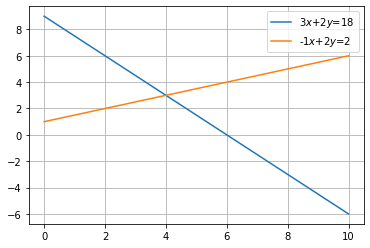

In [2]:
# Sistema con una única solución

# Primera ecuación
a = 3
b = 2 
c = 18
# Segunda ecuación
d = -1
e =  2
f =  2

graficar_rectas(a, b, c, d, e, f)


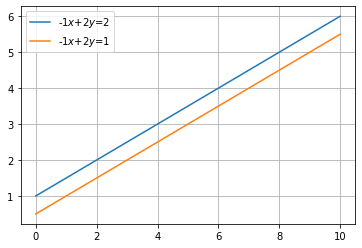

In [3]:
# Sistema sin solución.

# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -1
e =  2
f =  1

graficar_rectas(a, b, c, d, e, f)


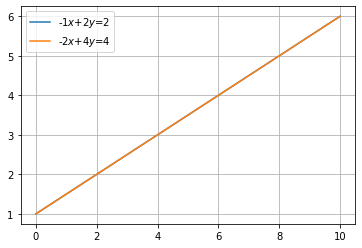

In [4]:
# Sistema con infinitas soluciones.

# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -2
e =  4
f =  4

graficar_rectas(a, b, c, d, e, f)


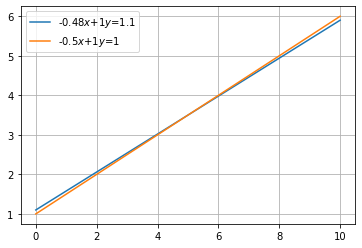

In [5]:
# Sistema mal condicionado.

# Primera ecuación
a = -2.4/5
b =  1 
c =  1.1
# Segunda ecuación
d = -1/2
e =  1
f =  1

graficar_rectas(a, b, c, d, e, f)


¿Qué ocurre si se sistematiza la solución de este tipo de sistema de ecuaciones 2x2?

$a x + b y = c$   (1)\
$d x + e y = f$   (2)

De (1) se despeja x y se reemplaza en (2):\
$x = \frac{c - b y}{a}$

Obteniendo:\
$d (\frac{c - b y}{a}) + e y = f$

Se despeja $y$:\
$y_{sol}=\frac{a f - c d}{a e - bd}$

Luego, reemplazando $y_{sol}$ en (1), se obtiene:
$x_{sol}=\frac{c e - bf}{a e - bd}$


In [6]:
# NO ES NECESARIO APRENDER NADA DE ESTE PROGRAMA POR EL MOMENTO
# El procedimiento matemático anterior se puede hacer con el siguiente código.
import sympy as sp

x, y, a, b, c, d, e, f = sp.symbols('x, y, a, b, c, d, e, f')

# Se presentan las ecuaciones igualadas a cero.
ec_1 = a*x + b*y -c
ec_2 = d*x + e*y -f

x_1 = sp.solve(ec_1, x)[0]    # Se despeja de la ec_1 la variable x, se pone [0] porque se llama la primera solución.
ec_2 = ec_2.subs(x, x_1)      # Se sustituye en la ecuación ec_2 el valor de x por el obtenido en x_1.
y_sol = sp.solve(ec_2, y)[0]  # Se despeja de la nueva ecuación ec_2 el valor de y (el itercepto en y).

# Para hallar el intercepto en x, solo se debe sustituir en la ecuación ec_1 con 
# el intercepto en y hallado, y despejar.
x_sol = sp.solve(ec_1.subs(y, y_sol), x)[0]


In [7]:
x_sol # Punto en x de la solución 2x2.


(-b*f + c*e)/(a*e - b*d)

In [8]:
y_sol # Punto en y de la solución 2x2.


(a*f - c*d)/(a*e - b*d)

Teniendo en cuenta esto, qué ocurre si se crea una función que arroje esta solución:



In [9]:
def sol_2x2(a, b, c, d, e, f):
    '''
        Solucionador básico de ecuaciones 2x2 a partir de los parámetros a, b, c, d, e, f.
        Donde:
        ax + by = c
        dx + ey = f
    '''
    x = (-b*f + c*e)/(a*e - b*d)  # Solución de x obtenida a mano.
    y = (a*f - c*d)/(a*e - b*d)   # Solución de y obtenida a mano.
    
    return x, y


In [10]:
# Sistema con una única solución

# Primera ecuación
a = 3
b = 2 
c = 18
# Segunda ecuación
d = -1
e =  2
f =  2

sol_2x2(a, b, c, d, e, f)


(4.0, 3.0)

In [11]:
# Sistema sin solución.

# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -1
e =  2
f =  1

sol_2x2(a, b, c, d, e, f)


ZeroDivisionError: division by zero

In [ ]:
# Sistema con infinitas soluciones.

# Primera ecuación
a = -1
b =  2 
c =  2
# Segunda ecuación
d = -2
e =  4
f =  4

sol_2x2(a, b, c, d, e, f)

In [12]:
# Sistema mal condicionado v1.

# Primera ecuación
a = -2.499999999999999/5  # Qué pasa si se ponen más o menos 9.
b =  1 
c =  1.000000000000001    # Qué pasa si se ponen más o menos 0.
# Segunda ecuación
d = -1/2
e =  1
f =  1

sol_2x2(a, b, c, d, e, f)


(6.666666666666667, 4.333333333333333)

In [13]:
# Sistema mal condicionado v2.

# Primera ecuación
a = -2.4999999999999999/5
b =  1 
c =  1.0000000000000001
# Segunda ecuación
d = -1/2
e =  1
f =  1

sol_2x2(a, b, c, d, e, f)


ZeroDivisionError: float division by zero

**Pregunta de clase**

¿Cómo diferenciar el 'ZeroDivisionError' de infinitas soluciones y de ninguna solución?\
Recomendación: revisar los valores $(a e - b d)$, $(-b f + c e)$ y $(a f - c d)$.

Un solucionador de ecuaciones mejorado, teniendo en cuenta las posibles causas de error:


In [14]:
def sol_2x2_mejorado(a, b, c, d, e, f):
    '''
        Solucionador básico de ecuaciones 2x2 a partir de los parámetros a, b, c, d, e, f.
        Donde:
        ax + by = c
        dx + ey = f
    '''
    if (a*e - b*d) == 0:
        if (-b*f + c*e) and (a*f - c*d):
            solucion = 'Infinitas soluciones'
        else:
            solucion = 'No tiene solución'
    else:     
        x = (-b*f + c*e)/(a*e - b*d)  # Solución de x obtenida a mano.
        y = (a*f - c*d)/(a*e - b*d)   # Solución de y obtenida a mano.
        solucion = (x, y)

    return solucion

In [15]:
# Ejemplo 1
a, b, c, d, e, f = 3, 2, 18, -1, 2, 2

sol_2x2_mejorado(a, b, c, d, e, f)


(4.0, 3.0)

In [16]:
# Ejemplo 2
a, b, c, d, e, f = -1, 2, 2, -1, 2, 1

sol_2x2_mejorado(a, b, c, d, e, f)


'Infinitas soluciones'

In [17]:
# Ejemplo 3
a, b, c, d, e, f = -1, 2, 2, -2, 4, 4

sol_2x2_mejorado(a, b, c, d, e, f)


'No tiene solución'

In [18]:
# Ejemplo 4
# Si se ponen nueves o ceros se puede obtener cualquiera de los 3 posibles resultados.
a, b, c, d, e, f = -2.499999999999999/5, 1, 1.0000000000000001, -1/2, 1, 1  

sol_2x2_mejorado(a, b, c, d, e, f)


(0.0, 1.0)

### Regla de Cramer

Dado un sistema de ecuaciones de 3 x 3:

$a_{11}x_{1}+a_{12}x_{2}+a_{13}x_{3}=b_{1}$\
$a_{21}x_{1}+a_{22}x_{2}+a_{23}x_{3}=b_{2}$\
$a_{31}x_{1}+a_{32}x_{2}+a_{33}x_{3}=b_{3}$

Se puede expresar como:

$\underline{\underline{A}}$  $\underline{X}=\underline{B}$, en donde:

$
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
\begin{bmatrix}
x_{1}  \\
x_{2}  \\
x_{3} 
\end{bmatrix}
=
\begin{bmatrix}
b_{1}  \\
b_{2}  \\
b_{3} 
\end{bmatrix}$

La solución $i$ se obtiene al dividir el reemplazo de la columna $i$ con el vector $\underline{B}$ entre el determinante de la matriz. Es decir, la solución **explícita del sistema** de 3 x 3 es:

$x_1=\frac{
\left|
\begin{array}{ccc}
b_{1} & a_{12} & a_{13}\\
b_{2} & a_{22} & a_{23}\\
b_{3} & a_{32} & a_{33}
\end{array}
\right|
}
{|\underline{\underline{A}}|}
$,
$x_2=\frac{
\left|
\begin{array}{ccc}
a_{11} & b_{1} & a_{13}\\
a_{21} & b_{2} & a_{23}\\
a_{31} & b_{3} & a_{33}
\end{array}
\right|
}
{|\underline{\underline{A}}|}
$,
$x_3=\frac{
\left|
\begin{array}{ccc}
a_{11} & a_{12} & b_{1}\\
a_{21} & a_{22} & b_{2}\\
a_{31} & a_{32} & b_{3}
\end{array}
\right|
}
{|\underline{\underline{A}}|}
$.

Donde $|\underline{\underline{A}}|$ es el determinante de la matriz A. Por lo que aparece el concepto de singularidad de un sistema y **matriz singular**, refiriéndose a aquellos casos en los que el determinante es 0. Los sistemas singulares se caracterizan por **no** presentar una única solución.


A continuación, se crea un función recursiva para hallar el determinante de una matriz. La función se basa en la siguiente fuente https://www.mycompiler.io/view/IVBmA7d

In [19]:
def determinante(M):
    '''
        Función recursiva
        Cálculo del determinante de una matriz en forma de lista de listas.
    '''
    if len(M) != len(M[0]):  # Verificación si es cuadrada.
        det = 'La matriz no es cuadrada'
        return det
    det = 0  # Variable de acumulación del determinante.
    if len(M)==2:  # Caso 2x2
        det = M[0][0]*M[1][1] - M[1][0]*M[0][1]
        return det
    else:
        for i in range(len(M)):
            M2 = [f[:] for f in M]  # Se crea una copia
            M2.remove(M[0])
            for j in range(len(M2)):
                M2[j] = M2[j][0:i] + M2[j][i+1:]  # Matriz de cofactores
            det += (-1)**(i)*M[0][i]*determinante(M2)
        return det


In [20]:
# Ejemplo 1 del determinante
M = [[ 2,  1, -1, 2],
     [ 4,  5, -3, 6],
     [-2,  5, -2, 6],
     [ 4, 10, -4, 8]]

determinante(M)


-8

In [21]:
# Ejemplo 2 del determinante
M = [[ 2,  1,  4, -1],
     [ 3, -2,  1,  0],
     [ 5,  1, -3,  2],
     [-1,  3,  3, -1]]

determinante(M)


0

In [22]:
# Ejemplo 3 del determinante
M = [[-9,  7,  2,  5,  7],
     [ 5,  3, -2,  2, -6],
     [ 2, -6, -5, -7, -8],
     [-2,  4, -2, -2, -6]]

determinante(M)


'La matriz no es cuadrada'

**Pregunta de clase**

A pesar de que la regla de Cramer tiene soluciones explícitas ¿por qué no se usa como método general de solución de sistemas de ecuaciones lineales?

A continuación se evalúa el costo computacional del cálculo de determinantes (mediante el teorema de Laplace) de matrices de diferentes tamaños.

In [23]:
# Se crea una matriz aleatoria de nxn
def crear_matriz_cuadrada_aleatoria(n):
    '''
        Función para crear una matriz aleatoria de nxn con valores entre -10 y 10.
    '''
    M =[]               # Reserva de espacio.
    for i in range(n):
        M += [[]]       # Se crea una nueva fila.
        for j in range(n):
            M[i] += [int(np.random.randint(-10, 10))]  # Se agrega un elemento aleatorio.
    return M


In [24]:
import time
tiempos = []  # Espacio para almacenar el tiempo de cálculo.

# Se evalúa el tiempo de cálculo del determinante entre n=2 y n=10.
for i in range(2, 11):
    M = crear_matriz_cuadrada_aleatoria(i)  # Función de creación de matriz.
    inicio = time.time()                    # Tiempo de incio.
    determinante(M)                         # Función de cálculo del determinante de matrices.
    fin = time.time()                       # Tiempo de fin.
    tiempos += [fin-inicio]


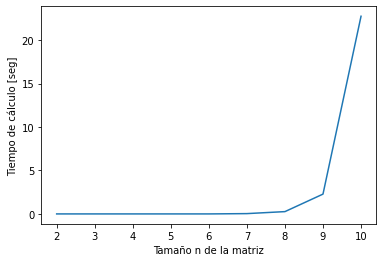

In [25]:
# Gráfica de costo computacional.
plt.figure()
plt.plot(list(range(2, 11)), tiempos)
plt.xlabel('Tamaño n de la matriz')    # Título del eje x.
plt.ylabel('Tiempo de cálculo [seg]')  # Título del eje y.
plt.show()                             # Imprime la gráfica.


Se define una función que solucione un sistema de nxn ecuaciones.

In [26]:
def crear_vector_aleatorio(n):
    '''
        Función para crear un vector de tamaño nx1 con valores entre -5 y 5.
    '''
    B =[]                                          # Reserva de espacio.
    for i in range(n):
        B += [int(np.random.randint(-5, 5))]     # Se agrega un elemento aleatorio.
    return B


In [27]:
def sol_cramer(A, B):
    '''
        Solución de un sistema AX=B, donde:
        A: coeficientes constantes, se ingresa como una lista de listas.
        X: incógnitas
        B: constantes, se ingresa como una lista.
    '''
    # Se consideran las posibles causas de error.
    if len(A) != len(A[0]):
        sol = 'La matriz de A no es cuadrada.'
    elif len(A) != len(B):
        sol = 'Los tamaños de A y B no coinciden.'
    elif len(A)== 1:
        sol = 'Se debe tener un sistema de mínimo 2x2'
    else:
        det_A = determinante(A)
        if det_A == 0:
            sol = 'Sistema singular'
        else:
            # Cálculos.
            sol = []  # Reserva de espacio de memoria.
            for j in range(len(A)):
                A2 = [f[:] for f in A]  # Se crea una copia.
                for i in range(len(A)):
                    A2[i][j] = B[i]                     
                sol += [determinante(A2)/det_A]
    return sol 


In [28]:
# Ejemplo 1.
n = 7
A1 = crear_matriz_cuadrada_aleatoria(n)
B1 = crear_vector_aleatorio(n)


In [29]:
print(A1)
print(B1)


[[7, 1, -9, -6, 6, 3, 0], [-6, 0, 9, -3, 0, 9, 3], [-8, 0, -5, 7, 7, 3, -10], [3, -2, -10, 5, 7, 4, -1], [-10, -1, 0, 7, -7, -4, -2], [-5, 3, 5, 5, 5, 9, 8], [-5, 2, -2, 1, 6, 2, -8]]
[-4, -2, 2, 1, 3, 4, 2]


In [30]:
sol_cramer(A1, B1)


[39.37849688678418,
 60.12742260808559,
 -1.4530825221432957,
 28.43471016399193,
 -54.64868894150662,
 48.54858370604227,
 -34.7614662808033]

In [31]:
# Ejemplo 2.
A2 = [[ 2,  1,  4, -1],
      [ 3, -2,  1,  0],
      [ 5,  1, -3,  2],
      [-1,  3,  3, -1]]

B2 = [1, -1, 4, 3]


In [32]:
sol_cramer(A2, B2)


'Sistema singular'

In [33]:
# Ejemplo 3.
A3 = [[-9,  7,  2,  5,  7],
      [ 5,  3, -2,  2, -6],
      [ 2, -6, -5, -7, -8],
      [-2,  4, -2, -2, -6]]

B3 = [1, -1, 4, 3]


In [34]:
sol_cramer(A3, B3)


'La matriz de A no es cuadrada.'

In [35]:
# Ejemplo 4 (fuente: http://anacrisstina-18.blogspot.com/2013/11/metodo-de-cramer-4x4.html)
A4 = [[-1, -1,  6,  9],
      [-5,  5, -3,  6],
      [ 7, -3,  5, -6],
      [ 3, -3, -2,  3]]

B4 = [-29, -54, 38, 41]


In [36]:
sol_cramer(A4, B4)


[4.0, -8.0, -4.0, -1.0]

**Resumen de comandos usados**
- definición de funciones con 'def', 'return'
- funciones recursivas
- L.remove() para listas.
- np.random.randint()
- time.time()
- ciclo 'for'
- range()
- plt.figure()
- plt.plot( __, __ ) 
- plt.legend()
- plt.grid()
- plt.show()

